In [18]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.interpolate import CubicSpline

In [98]:
def fit_constrained(x, y):
    def polynomial(p, x):
        return p[0]+p[1]*x+p[2]*x**2+p[3]*x**3

    def constraint_1st_der(p):
        return p[1]+2*p[2]*x+3*p[3]*x**2
    
    def constraint_end_pt(p):
        return polynomial(p,x[-1])-y[-1]

    def objective(p):
        return ((polynomial(p, x)-y)**2).sum()

    x0 = np.array([y[0], (y[-1]-y[0])/(x[-1]-x[0]), 0, 0])
    #assert np.isclose(polynomial(x0, x[-1]), y[-1]), f"end point mismatch {polynomial(x0, x[-1])} == {y[-1]}"
    #assert np.isclose(polynomial(x0, x[0]) == y[0])
    res = scipy.optimize.minimize(
        objective, 
        x0=x0, 
        method='SLSQP', 
        constraints=(dict(type='ineq', fun=constraint_1st_der), dict(type='eq', fun=constraint_end_pt))
    )
    print(res)
    return lambda x: polynomial(res.x, x)

In [80]:
x = np.array([10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0, 90.0, 100.0, 110.0, 120.0, 130.0, 140.0, 150.0, 160.0, 170.0, 180.0, 190.0, 200.0, 210.0, 220.0, 230.0, 240.0, 250.0, 260.0, 270.0, 280.0, 290.0, 300.0, 310.0, 320.0, 330.0, 340.0, 350.0, 360.0, 370.0, 380.0, 390.0, 400.0, 410.0, 420.0, 430.0, 440.0, 450.0, 460.0, 470.0, 480.0, 490.0, 500.0, 510.0, 520.0, 530.0, 540.0, 550.0, 560.0, 570.0, 580.0, 590.0, 600.0, 610.0, 620.0, 630.0, 640.0, 650.0, 660.0, 670.0, 680.0, 690.0, 700.0, 710.0, 720.0, 730.0, 740.0, 750.0, 760.0, 770.0, 780.0, 790.0, 800.0, 810.0, 820.0, 830.0, 840.0, 850.0, 860.0, 870.0, 880.0, 890.0, 900.0, 910.0, 920.0, 930.0, 940.0, 950.0, 960.0, 970.0, 980.0, 990.0, 1000.0, 401207] )
y = np.array([0.4743925391651562, 0.4745267983898838, 0.5012319527009724, 0.4996382459778174, 0.5172386358268255, 0.4872366716640933, 0.5201276954404076, 0.5590703294572198, 0.6399639986375175, 0.6369680289005413, 0.6520622465546349, 0.7308102544212308, 0.7434132175720463, 0.7648549130174264, 0.8182403588202095, 0.8315941791167235, 0.8381977439477681, 0.8538712652937418, 0.8559373655853827, 0.8652186560651605, 0.8658228225764345, 0.867108230339104, 0.8687168547538954, 0.8713175056625071, 0.8720434999888117, 0.875089195364576, 0.8767574905459129, 0.8781672124055524, 0.881352139569923, 0.8810537857371951, 0.8804893997369514, 0.8813546258518623, 0.8825629588744104, 0.8840000298353833, 0.8852207942676283, 0.885118856708113, 0.8835674167779278, 0.8861979030698123, 0.8857031329638718, 0.8862749778099337, 0.8870233486736929, 0.8874136949381786, 0.888244113105938, 0.8875802758281184, 0.8865310648496918, 0.8879929986300586, 0.8887413694938179, 0.8890819901195156, 0.8896289721461834, 0.8891491197318794, 0.8894002342077587, 0.8896414035558804, 0.8901610364812149, 0.8893082417760009, 0.8896712389391532, 0.8938581377251017, 0.8945891046152852, 0.8952081888181956, 0.89539714624559, 0.8965905615765016, 0.8977516552422011, 0.8978511065197772, 0.8983185275243842, 0.8984005748283844, 0.8988157839122641, 0.8986939560972335, 0.8983707394451116, 0.8986293127668091, 0.899226020432265, 0.8993006088904469, 0.8986516893042638, 0.8995691273399021, 0.9001857252608731, 0.9009415549704506, 0.9008868567677838, 0.9013468189265726, 0.9021076212000289, 0.9019758482572406, 0.9029952238523944, 0.9034502134473044, 0.9034178917820924, 0.9037858615091234, 0.9041612900819728, 0.9044720753243976, 0.9045516363464584, 0.9048151822320348, 0.9044173771217308, 0.9042731727692456, 0.9043353298177308, 0.9041687489277908, 0.9050215436330048, 0.9049121472276712, 0.9046336836504586, 0.9046958406989436, 0.9047579977474286, 0.9045789854477918, 0.9049295512012472, 0.904872366716641, 0.9058544480827035, 0.9058718520562796, 0.9516293848689854])

In [108]:
x[-2], y[-2]

(1000.0, 0.9058718520562796)

In [244]:
# Custom function curve fit
order = 6
def func(x, bot, top, *args):
    bases = np.array(args[:order])
    exponents = np.array(args[order:])
    return top*bot+(top*(1-bot)/order)*np.sum(
        np.power(
            np.repeat(bases, x.shape[0]), -np.repeat(exponents, x.shape[0])/np.repeat(x, exponents.shape[0])
        ).reshape(x.shape[0], exponents.shape[0]),
        axis=1
    )
#x0 = [y[0], y[-1], 19., 1.4, 20.3, 110., 1, 1]
x0 = [y[0], y[-1], *[1. for i in range(2*order)]]
#x0 = [y[0], y[-1], 19., 1.4, 1, 1, 1, 20.3, 110., 1, 1, 1]
bounds = ([0, 0, *[1 for i in range(order)], *[0 for i in range(order)]], [1, 1, *[np.inf for i in range(2*order)]])
custom_fit = curve_fit(func, x[9:], y[9:], x0, maxfev=10000, method='dogbox')
print(custom_fit[0])

<ipython-input-244-9261d1021212>:7: RuntimeWarning: invalid value encountered in power
  np.power(


[-2.15629370e+03  9.95316014e-01  1.09529207e+00  1.11490992e+00
  7.46900549e-01  1.15385949e+00  1.08744933e+00  1.18002399e+00
  1.59325331e-01  1.52743732e-01 -8.06029491e-02  1.99069975e-01
  4.03550828e-01  2.37356782e-01]


In [302]:
order = 1
def funch(x, *args):
    a = args[:order]
    b = args[order:]
    return np.sum((1-np.repeat(a, x.shape[0])/(np.repeat(x, order)+np.repeat(b, x.shape[0]))).reshape(x.shape[0], order), axis=1)

custom_fit_h = curve_fit(funch, x, y, [*[0.3]*order, *[0]*order], maxfev=10000)

In [163]:
print(list(custom_fit[0]))

[0.5639122188522278, 0.7806009655720669, 91.69339540517007, 414.09689625503376, 924.3682580304541, 3.592374072277848e-27, 8.409158857813224e-44, 19.214752807797, 12.359530431331576, 16.971714548821215, -2.4350108115013493, -1.825559099997269]


In [267]:
# Weighted polynomial fit
w = np.full(len(y[9:]), 1e-3)
w[-1] = 10.0
w[0] = 1.0
w[-2] = 1.0
#w[20] = 1.0
poly_fit = np.polyfit(x[9:], y[9:], 10, w=None)

/home/zac/.cache/pypoetry/virtualenvs/research-vDwbEF2m-py3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3437: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


In [249]:
# Constrainted polynomial fit
poly = fit_constrained(x, y)

     fun: 15.146229302961201
     jac: array([-7.44767683e+01, -3.95673644e+04,  3.86094924e+14,  6.21485675e+25])
 message: 'Inequality constraints incompatible'
    nfev: 5
     nit: 1
    njev: 1
  status: 4
 success: False
       x: array([4.74392539e-01, 1.18953244e-06, 0.00000000e+00, 0.00000000e+00])


In [56]:
# Cubic spline
cs = scipy.interpolate.CubicSpline([x[0], x[20], x[-2], x[-1]], [y[0], y[20], y[-2], y[-1]], bc_type=('not-a-knot', 'clamped'))
cs = CubicSpline(x, y, bc_type=('not-a-knot', 'clamped'))

In [245]:
print("Final pred", func(np.array([x[-1]]), *custom_fit[0])[0], "final real", y[-1])

Final pred 0.9951766435542595 final real 0.9516293848689854


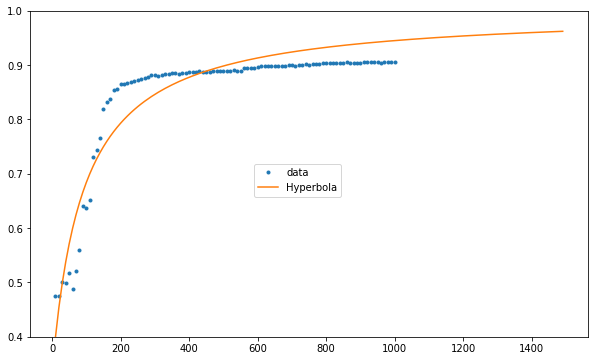

In [303]:
fig, ax = plt.subplots(figsize=(10,6))
plt_x = np.arange(x[0], 1500, 10)
models = {
    #"initial": func(plt_x, *x0),
    #"exp & polynomial": func(plt_x, *custom_fit[0]),
    #"Poly": np.polyval(poly_fit, plt_x),
    #"Constrained poly": poly(plt_x),
    #"Cubic spline": cs(plt_x),
    "Hyperbola": funch(plt_x, *custom_fit_h[0])
}
ax.plot(x[:-1],y[:-1], ls='', marker='.', label='data')
#ax.plot(x[:9], y[:9], ls='', marker='+', color='red')
for i, (name, model) in enumerate(models.items()):
    ax.plot(plt_x, model, label=name)
ax.set_ylim((0.4,1))
fig.legend(loc='center');